# Name Basics
### Cleaning

In [1]:
library("ggplot2")
library("dplyr")
library("tidyverse")
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.0.4     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
name_basics = read.delim("./../dataset/filtered_name_basics.tsv",header=TRUE)

In [3]:
nrow(name_basics)

[1] 1634635

In [4]:
head(name_basics)

nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0072308,tt0050419,tt0031983"
nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382"
nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0057345,tt0059956"
nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0078723,tt0080455"
nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0060827,tt0083922,tt0050976"
nm0000006,Ingrid Bergman,1915,1982,"actress,soundtrack,producer","tt0034583,tt0036855,tt0038787,tt0038109"


In [5]:
tail(name_basics)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
1634630,nm9993680,Christopher-Lawson Palmer,\N,\N,actor,"tt10427366,tt8295580,tt10979852"
1634631,nm9993693,Anketa Maharana,\N,\N,actress,"tt9815360,tt8737752"
1634632,nm9993694,Chinmay Mishra,\N,\N,actor,"tt10140990,tt8737752,tt9083282,tt9097592"
1634633,nm9993703,James Craigmyle,\N,\N,actor,"tt10627062,tt6225166,tt6914160,tt11212278"
1634634,nm9993708,Eli Bevins,\N,\N,"director,writer,editor","tt11772940,tt11772858,tt11772904,tt11702702"
1634635,nm9993709,Lu Bevins,\N,\N,"director,writer,cinematographer","tt11772858,tt11772940,tt11702702,tt11772904"


In [6]:
#any change in name_basics will be done in nb_clean
nb_clean = name_basics

### nconst
 - identifier of the person

### primaryName
 - name of the person with nconst
 
### birthYear
 - need to examine this 

### primaryProfession
 - divide this into three columns

### knownForTitles
 - investigate this column for max number and decide

## birthYear

In [7]:
str(nb_clean$birthYear)

 Factor w/ 387 levels "\\N","0004","0021",..: 270 295 305 320 289 286 270 295 296 270 ...


In [8]:
unique(nb_clean$birthYear)

[1] 1899 1924 1934 1949 1918 1915 1925 1901 1908 1922 1916 1931 1920 1905 1917
 [16] 1904 1929 1914 1954 1907 1923 1953 1895 1912 1921 1928 1910 1913 1940 1890
 [31] 1909 1926 1935 1893 1911 1898 1888 1932 1900 1906 1938 \\N  1965 1950 1927
 [46] 1930 1942 1939 1963 1968 1967 1969 1955 1952 1958 1974 1960 1945 1975 1959
 [61] 1962 1964 1957 1973 1948 1889 1961 1970 1966 1979 1956 1943 1972 1944 1937
 [76] 1946 1947 1971 1981 1980 1976 1977 1951 1892 1936 1941 1933 1982 1894 1875
 [91] 1887 1882 1903 1919 1809 1564 1902 1897 1775 1885 1879 1878 1856 1884 1984
[106] 1881 1883 1880 1986 1978 1896 1985 1983 1685 1891 1886 1877 1812 1868 1874
[121] 1852 1851 1770 1990 1988 1866 1847 1813 1756 1712 1987 1869 1992 1989 1872
[136] 1860 1838 1833 1810 1862 1797 1841 1843 1870 1819 1873 1844 1792 1835 1865
[151] 1864 1825 1840 1678 1776 1861 1859 1828 1854 1803 1871 1849 1876 1855 1858
[166] 1848 1830 1805 1867 1791 1991 1671 1640 1832 1836 1821 1839 1837 1265 1863
[181] 1996 1834 1793 1761 1993 1474 1857 1820 1853 1842 1799 1808 1850 1845 1846
[196] 1823 1732 1801 1740 1829 1180 1737 1789 1757 1811 1782 1313 1994 1995 1826
[211] 1822 1763 1748 1816 1818 1698 1806 1747 1543 1788 1796 1510 1817 1715 1725
[226] 1547 1343 1749 1710 1772 1824 1767 1606 1668 1542 1773 1815 1711 1714 1283
[241] 1764 1600 1621 1777 1688 1584 1503 1785 1660 1790 1530 1713 1804 1572 1508
[256] 1802 1468 1766 1784 1707 1579 1807 1586 1778 1717 1997 1998 1831 1730 1720
[271] 1150 1716 1795 1786 1741 1787 1697 1684 1529 1783 1774 1485 0037 1768 1634
[286] 1814 1751 1729 0059 1562 1330 1469 1414 1440 1686 1745 1798 1580 1608 1622
[301] 1567 1779 1760 1618 0973 1674 1653 1628 1727 1635 1639 1734 1689 1465 1585
[316] 1207 1664 1398 1759 1771 0004 1999 1827 2002 1667 1544 1652 1681 1130 1755
[331] 1735 1550 1549 1431 1694 1781 1578 1641 1743 1589 2009 2003 2010 2000 2008
[346] 2004 2017 2005 2006 2001 2007 2012 2014 2011 1532 2015 1677 1506 2013 1587
[361] 1670 1758 1733 0163 0046 1765 1098 1494 1780 1583 1593 1291 1644 1452 1413
[376] 1769 1658 1794 1566 1568 1492 1654 1633 1746 0021 1632 1631
387 Levels: \\N 0004 0021 0037 0046 0059 0163 0973 1098 1130 1150 1180 ... 2017

In [9]:
nrow(nb_clean[nb_clean$birthYear=="\\N",])/nrow(nb_clean)

[1] 0.8502754


- birthYear has most of its values as NA and would be very complicated to handle 

- it's a useless feature.

In [10]:
nb_clean$birthYear=NULL

## deathYear

In [11]:
str(nb_clean$deathYear)

 Factor w/ 339 levels "\\N","0017","0065",..: 306 333 1 301 326 301 276 323 303 305 ...


In [12]:
nb_clean["isDead"] <- NA

In [13]:
head(nb_clean)

nconst,primaryName,deathYear,primaryProfession,knownForTitles,isDead
nm0000001,Fred Astaire,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0072308,tt0050419,tt0031983",NA
nm0000002,Lauren Bacall,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382",NA
nm0000003,Brigitte Bardot,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0057345,tt0059956",NA
nm0000004,John Belushi,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0078723,tt0080455",NA
nm0000005,Ingmar Bergman,2007,"writer,director,actor","tt0050986,tt0060827,tt0083922,tt0050976",NA
nm0000006,Ingrid Bergman,1982,"actress,soundtrack,producer","tt0034583,tt0036855,tt0038787,tt0038109",NA


In [14]:
nb_clean$isDead[nb_clean$deathYear == "\\N"] = 0 

In [15]:
nb_clean$isDead[nb_clean$deathYear != "\\N"] = 1

In [16]:
head(nb_clean)

nconst,primaryName,deathYear,primaryProfession,knownForTitles,isDead
nm0000001,Fred Astaire,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0072308,tt0050419,tt0031983",1
nm0000002,Lauren Bacall,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382",1
nm0000003,Brigitte Bardot,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0057345,tt0059956",0
nm0000004,John Belushi,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0078723,tt0080455",1
nm0000005,Ingmar Bergman,2007,"writer,director,actor","tt0050986,tt0060827,tt0083922,tt0050976",1
nm0000006,Ingrid Bergman,1982,"actress,soundtrack,producer","tt0034583,tt0036855,tt0038787,tt0038109",1


In [17]:
nb_clean$deathYear=NULL

## primaryProfession
 - It is up to 3 so we will be dividing this into 3 columns with 0 where no profession is assigned

In [18]:
nrow(nb_clean[nb_clean$primaryProfession=="\\N",])/nrow(nb_clean) #no rows with no primaryProfession

[1] 0

In [19]:
str(nb_clean$primaryProfession)

 Factor w/ 12980 levels "","actor","actor,actress",..: 11158 1569 1589 748 12618 1590 737 728 737 728 ...


In [20]:
professions= str_split(nb_clean$primaryProfession,',')

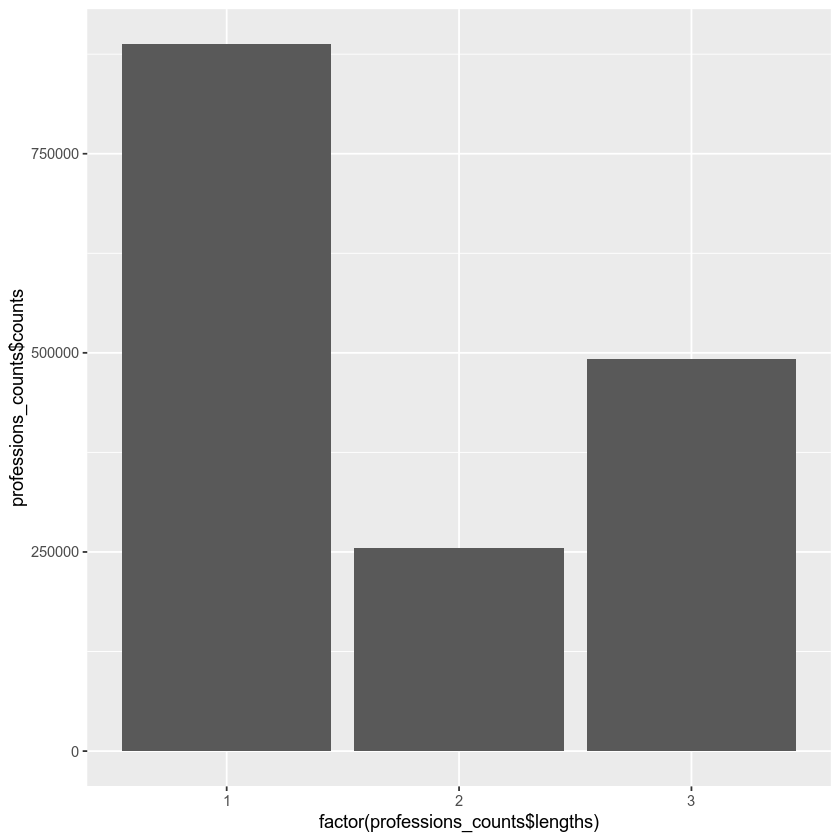

In [21]:
count_1 = length(which(lengths(professions) == 1))
count_2 = length(which(lengths(professions) == 2))
count_3 = length(which(lengths(professions) == 3))
lengths = c(1,2,3)
counts=c(count_1,count_2,count_3)
professions_counts = data.frame(lengths,counts)
ggplot(professions_counts,aes(x=factor(professions_counts$lengths),y=professions_counts$counts))+geom_bar(stat="identity")

In [22]:
nb_clean = separate(nb_clean,primaryProfession,c("primaryProfession1","primaryProfession2","primaryProfession3"),",")

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 1142792 rows [2, 14, 15, 23, 29, 30, 34, 38, 39, 47, 58, 74, 75, 84, 89, 102, 104, 108, 120, 123, ...].”

In [23]:
head(nb_clean)

nconst,primaryName,primaryProfession1,primaryProfession2,primaryProfession3,knownForTitles,isDead
nm0000001,Fred Astaire,soundtrack,actor,miscellaneous,"tt0053137,tt0072308,tt0050419,tt0031983",1
nm0000002,Lauren Bacall,actress,soundtrack,NA,"tt0117057,tt0071877,tt0038355,tt0037382",1
nm0000003,Brigitte Bardot,actress,soundtrack,music_department,"tt0049189,tt0054452,tt0057345,tt0059956",0
nm0000004,John Belushi,actor,soundtrack,writer,"tt0072562,tt0077975,tt0078723,tt0080455",1
nm0000005,Ingmar Bergman,writer,director,actor,"tt0050986,tt0060827,tt0083922,tt0050976",1
nm0000006,Ingrid Bergman,actress,soundtrack,producer,"tt0034583,tt0036855,tt0038787,tt0038109",1


In [24]:
#assigning sentinel value 0 to the ones that have NA
nb_clean$primaryProfession1[is.na(nb_clean$primaryProfession1)] <- 0
nb_clean$primaryProfession2[is.na(nb_clean$primaryProfession2)] <- 0
nb_clean$primaryProfession3[is.na(nb_clean$primaryProfession3)] <- 0


In [25]:
head(nb_clean)

nconst,primaryName,primaryProfession1,primaryProfession2,primaryProfession3,knownForTitles,isDead
nm0000001,Fred Astaire,soundtrack,actor,miscellaneous,"tt0053137,tt0072308,tt0050419,tt0031983",1
nm0000002,Lauren Bacall,actress,soundtrack,0,"tt0117057,tt0071877,tt0038355,tt0037382",1
nm0000003,Brigitte Bardot,actress,soundtrack,music_department,"tt0049189,tt0054452,tt0057345,tt0059956",0
nm0000004,John Belushi,actor,soundtrack,writer,"tt0072562,tt0077975,tt0078723,tt0080455",1
nm0000005,Ingmar Bergman,writer,director,actor,"tt0050986,tt0060827,tt0083922,tt0050976",1
nm0000006,Ingrid Bergman,actress,soundtrack,producer,"tt0034583,tt0036855,tt0038787,tt0038109",1


## knownForTitles

In [26]:
nrow(nb_clean[nb_clean$knownForTitles=="\\N",])/nrow(nb_clean)

[1] 0.06270574

 - Relevant information for the dataset, we should keep it; but we should remove rows withtout this information
 
We must evaluate the discrepancy of number of titles in this column

In [27]:
nb_clean=nb_clean[nb_clean$knownForTitles!='\\N',]

In [28]:
nrow(nb_clean[nb_clean$knownForTitles=="\\N",])/nrow(nb_clean) #ok!

[1] 0

In [29]:
nrow(nb_clean)

[1] 1532134

In [30]:
knownForTitles= str_split(nb_clean$knownForTitles,',')

In [31]:
max(lengths(knownForTitles)) 
mean(lengths(knownForTitles))
min(lengths(knownForTitles)) 

[1] 6

[1] 2.728492

[1] 1

 - Let's plot the distribution for the number of titles

In [32]:
unique(lengths(knownForTitles))

[1] 4 1 3 2 5 6

In [39]:
count_1 = length(which(lengths(knownForTitles) == 1))
count_2 = length(which(lengths(knownForTitles) == 2))
count_3 = length(which(lengths(knownForTitles) == 3))
count_4 = length(which(lengths(knownForTitles) == 4))
count_5 = length(which(lengths(knownForTitles) == 5))
count_6 = length(which(lengths(knownForTitles) == 6))

In [40]:
lengths = c(1,2,3,4,5,6)
counts=c(count_1,count_2,count_3,count_4,count_5,count_6)
titles_counts = data.frame(lengths,counts)

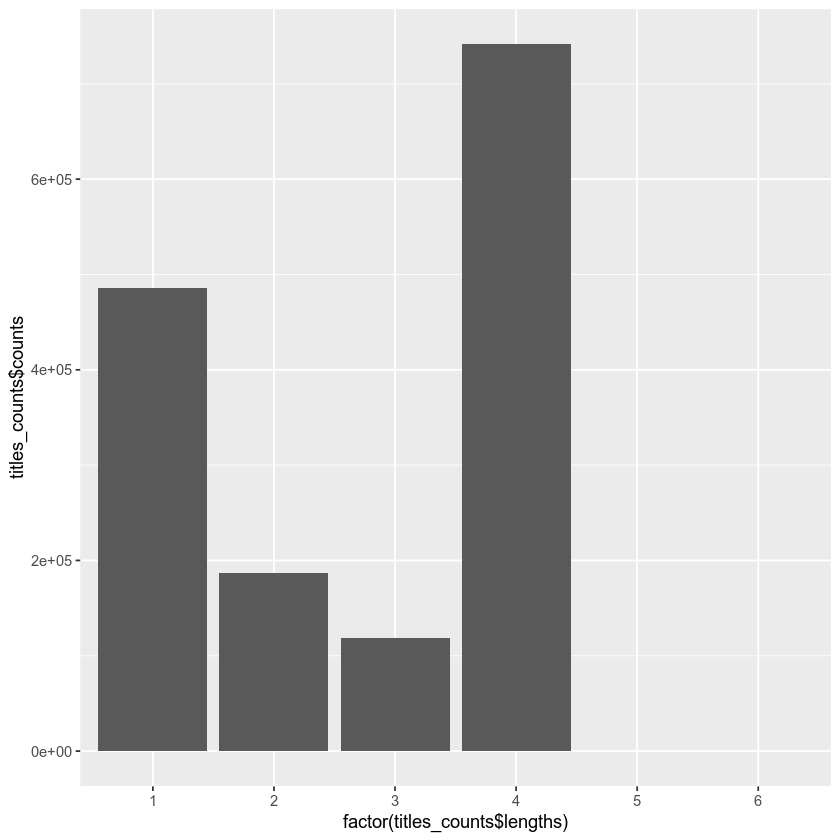

In [41]:
ggplot(titles_counts,aes(x=factor(titles_counts$lengths),y=titles_counts$counts))+geom_bar(stat="identity")

In [42]:
count_5

[1] 23

In [43]:
count_6

[1] 2

 - Only 23 rows have 5 instances in knownForTitles and only 2 of them have 6, so we will be separating this in only 4 columns, with the first 4 movie titles

In [44]:
nb_clean = separate(nb_clean,knownForTitles,c("knownForTitles1","knownForTitles2","knownForTitles3","knownForTitles4"),",")

Warning message:
“Expected 4 pieces. Additional pieces discarded in 25 rows [43583, 65024, 102309, 199554, 280425, 368469, 535735, 567532, 609609, 630262, 679975, 768857, 779025, 782670, 940598, 1016504, 1035299, 1197829, 1256828, 1309720, ...].”Warning message:
“Expected 4 pieces. Missing pieces filled with `NA` in 790803 rows [333, 349, 475, 555, 663, 664, 712, 797, 964, 1060, 1489, 1659, 1706, 1737, 1752, 2065, 2244, 2255, 2280, 2313, ...].”

In [45]:
head(nb_clean)

nconst,primaryName,primaryProfession1,primaryProfession2,primaryProfession3,knownForTitles1,knownForTitles2,knownForTitles3,knownForTitles4,isDead
nm0000001,Fred Astaire,soundtrack,actor,miscellaneous,tt0053137,tt0072308,tt0050419,tt0031983,1
nm0000002,Lauren Bacall,actress,soundtrack,0,tt0117057,tt0071877,tt0038355,tt0037382,1
nm0000003,Brigitte Bardot,actress,soundtrack,music_department,tt0049189,tt0054452,tt0057345,tt0059956,0
nm0000004,John Belushi,actor,soundtrack,writer,tt0072562,tt0077975,tt0078723,tt0080455,1
nm0000005,Ingmar Bergman,writer,director,actor,tt0050986,tt0060827,tt0083922,tt0050976,1
nm0000006,Ingrid Bergman,actress,soundtrack,producer,tt0034583,tt0036855,tt0038787,tt0038109,1


In [46]:
#substitute NAs with 0s
nb_clean$knownForTitles1[is.na(nb_clean$knownForTitles1)] <- 0
nb_clean$knownForTitles2[is.na(nb_clean$knownForTitles2)] <- 0
nb_clean$knownForTitles3[is.na(nb_clean$knownForTitles3)] <- 0
nb_clean$knownForTitles4[is.na(nb_clean$knownForTitles4)] <- 0


In [47]:
tail(nb_clean)

,nconst,primaryName,primaryProfession1,primaryProfession2,primaryProfession3,knownForTitles1,knownForTitles2,knownForTitles3,knownForTitles4,isDead
1634630,nm9993680,Christopher-Lawson Palmer,actor,0,0,tt10427366,tt8295580,tt10979852,0,0
1634631,nm9993693,Anketa Maharana,actress,0,0,tt9815360,tt8737752,0,0,0
1634632,nm9993694,Chinmay Mishra,actor,0,0,tt10140990,tt8737752,tt9083282,tt9097592,0
1634633,nm9993703,James Craigmyle,actor,0,0,tt10627062,tt6225166,tt6914160,tt11212278,0
1634634,nm9993708,Eli Bevins,director,writer,editor,tt11772940,tt11772858,tt11772904,tt11702702,0
1634635,nm9993709,Lu Bevins,director,writer,cinematographer,tt11772858,tt11772940,tt11702702,tt11772904,0


## Save the new file

In [48]:
 #For using write_tsv
library(readr)
write_tsv(nb_clean,'cleaned_filtered_name_basics.tsv')